We'll work with the 2015 World Happiness Report again and additional economic data from the World Bank. You can find the data set [here](https://www.kaggle.com/worldbank/world-development-indicators/version/2).

Below are descriptions for the columns we'll be working with:

- ShortName - Name of the country
- Region - The region the country belongs to
- IncomeGroup - The income group the country belongs to, based on Gross National Income (GNI) per capita
- CurrencyUnit - Name of country's currency
- SourceOfMostRecentIncomeAndExpenditureData - The name of the survey used to collect the income and expenditure data
- SpecialNotes - Contains any miscellaneous notes about the data

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

happiness2015 = pd.read_csv("World_Happiness_2015.csv")
world_dev = pd.read_csv("World_dev.csv")


In [313]:
world_dev.rename({"SourceOfMostRecentIncomeAndExpenditureData":"IESurvey"}, axis = 1, inplace = True)
world_dev.head(1)

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0


In [314]:
merged = pd.merge(left = happiness2015, right = world_dev,how = "left",left_on= "Country", right_on= "ShortName")
merged.head(2)

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0


In [315]:
def extract_last_word(element):
    return str(element).split()[-1]

extract_last_word("Afghan afghani") # testing

'afghani'

In [316]:
merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word) # element wise applying function
#merged['Currency Apply'] = merged['CurrencyUnit'].map(extract_last_word) # element wise applying function
# merged['Currency Apply'] = merged['CurrencyUnit'].str.split().str[-1] 
# The str attribute indicates that each object in the Series should be treated as a string
# we also use str to index or slice the string
merged['Currency Apply'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Apply, dtype: object

In [317]:
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1) # str.get() Retrieves the ith element of each element in the Series.
merged['Currency Vectorized'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object

Using vectorized string methods results in:

1. Better performance
2. Code that is easier to read and write

In [318]:
merged['CurrencyUnit'].isnull().sum()

13

In [319]:
# Calculate the length of each element in the CurrencyUnit column

lengths = merged["CurrencyUnit"].str.len()
value_counts = lengths.value_counts(dropna = False)
value_counts

 14.0    21
 4.0     20
 12.0    17
 13.0    14
NaN      13
 15.0    13
 16.0    12
 18.0     9
 17.0     9
 11.0     8
 22.0     7
 25.0     5
 19.0     3
 9.0      2
 10.0     1
 39.0     1
 26.0     1
 23.0     1
 20.0     1
Name: CurrencyUnit, dtype: int64

In [320]:
def compute_lengths(element):
    return len(str(element))
lengths_apply = merged['CurrencyUnit'].apply(compute_lengths)
lengths_apply.value_counts(dropna = False)

14    21
4     20
12    17
13    14
3     13
15    13
16    12
18     9
17     9
11     8
22     7
25     5
19     3
9      2
26     1
20     1
23     1
10     1
39     1
Name: CurrencyUnit, dtype: int64

Since the original column had 13 missing values and NaN doesn't appear in the list of unique values above, we know our function must have treated NaN as a string and returned a length of 3 for each NaN value. This doesn't make sense - missing values shouldn't be treated as strings. They should instead have been excluded from the calculation.

In [321]:
# If we wanted to exclude missing values, we'd have to update our function 
def compute_lengths(element):
    if pd.isnull(element):
        pass
    else:
        return len(str(element))
lengths_apply = merged['CurrencyUnit'].apply(compute_lengths)
lengths_apply.value_counts(dropna = False)

 14.0    21
 4.0     20
 12.0    17
 13.0    14
NaN      13
 15.0    13
 16.0    12
 18.0     9
 17.0     9
 11.0     8
 22.0     7
 25.0     5
 19.0     3
 9.0      2
 10.0     1
 39.0     1
 26.0     1
 23.0     1
 20.0     1
Name: CurrencyUnit, dtype: int64

In [322]:
pd.isnull(np.nan)

True

we identified a third benefit of using vectorized string methods - they exclude missing values:

1. Better performance
2. Code that is easier to read and write
3. Automatically excludes missing values

# regular expressions or regex

A regular expression is a sequence of characters that describes a search pattern, used to match characters in a string

In pandas, regular expressions is integrated with vectorized string methods to make finding and extracting patterns of characters easier. [Documentation for reference](https://docs.python.org/3.4/library/re.html)

In [323]:
''' we needed to parse the elements of a Series to find a string or substring that doesn't appear in the same position in each string.
For example, let's look at the SpecialNotes column.A number of rows mention "national accounts", 
but the words appear in different places in each comment:'''
merged["SpecialNotes"].head(10)

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    Fiscal year end: March 31; reporting period fo...
5    A simple multiplier is used to convert the nat...
6    A simple multiplier is used to convert the nat...
7    Fiscal year end: June 30; reporting period for...
8    Fiscal year end: March 31; reporting period fo...
9    Fiscal year end: June 30; reporting period for...
Name: SpecialNotes, dtype: object

In [324]:
pattern = r"[Nn]ational accounts" # Python raw string is created by prefixing a string literal with ‘r’ or ‘R’
# raw string is useful when we want to have a string that contains backslash and don’t want it to be treated as an escape character.
# The brackets, [], indicate that either "national accounts" or "National accounts" should produce a match


In [325]:
# search for pattern in the SpecialNotes column
national_accounts = merged["SpecialNotes"].str.contains(pattern)
national_accounts.head(7)

0      NaN
1      NaN
2      NaN
3      NaN
4     True
5    False
6    False
Name: SpecialNotes, dtype: object

In [326]:
national_accounts = merged["SpecialNotes"].str.contains(pattern,na = False) # change the NaN values to False in national_accounts
national_accounts.value_counts(dropna = False)

False    104
True      54
Name: SpecialNotes, dtype: int64

In [327]:
# rows that contain "national accounts" or "National accounts" in the SpecialNotes
merged_national_accounts = merged[national_accounts] 
merged_national_accounts["SpecialNotes"].head(2)

4    Fiscal year end: March 31; reporting period fo...
7    Fiscal year end: June 30; reporting period for...
Name: SpecialNotes, dtype: object

# extracting characters from strings.

In year 2018, the first digit can be either 1 or 2, while the last three digits can be any number between 0 and 9.

With regular expressions, we use the following syntax to indicate a character could be a range of numbers:

pattern = r"[0-9]"

And we use the following syntax to indicate a character could be a range of letters:

#lowercase letters
pattern1 = r"[a-z]"
​
#uppercase letters
pattern2 = r"[A-Z]"

if we wanted to find a three character substring in a column that starts with a number between 1 and 6 and ends with two letters of any kind, we could use the following syntax:

pattern = r"[1-6][a-z][a-z]"

If we have a pattern that repeats, we can also use curly brackets { and } to indicate the number of times it repeats:

pattern = r"[1-6][a-z][a-z]" = r"[1-6][a-z]{2}"

In [328]:
# a regular expression that will match years
pattern = R'([1-2][0-9]{3})'

In [329]:
# extract years from the SpecialNotes column.
years = merged["SpecialNotes"].str.extract(pattern)
type(years)

pandas.core.frame.DataFrame

When we used the Series.str.extract() method, we enclosed our regular expression in parentheses. The parentheses indicate that only the character pattern matched should be extracted and returned in a series. We call this a capturing group

If the capturing group doesn't exist in a row (or there is no match) the value in that row is set to NaN

We can also return the results as a dataframe by changing the expand parameter to True.

In [330]:
years = merged["SpecialNotes"].str.extract(pattern, expand = True)
type(years)

pandas.core.frame.DataFrame

Series.str.extract() method to extract a pattern of characters from a column as a dataframe by setting the expand parameter equal to True. However, the Series.str.extract() method will only extract the first match of the pattern. If we wanted to extract all of the matches, we can use the Series.str.extractall() method.

In [331]:
# merged.head()
merged = merged.set_index("Country") # set the Country column as the index
merged.head(2)

,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
Country,,,,,,,,,,,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,...,2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0,franc,franc
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,...,2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0,krona,krona


In [332]:
# merged.reset_index(inplace = True)
merged["IESurvey"].head(2)


Country
Switzerland    Expenditure survey/budget survey (ES/BS), 2004
Iceland               Integrated household survey (IHS), 2010
Name: IESurvey, dtype: object

In [333]:
pattern = r'(?P<years>[1-2][0-9]{3})'
years = merged["IESurvey"].str.extractall(pattern) # extract all of the years in the IESurvey
value_counts = years["years"].value_counts() 
value_counts

2012    33
2010    28
2011    22
2013    12
2009     8
2008     6
2005     6
2007     4
2004     3
1998     1
1999     1
2000     1
2002     1
1995     1
2003     1
2006     1
1992     1
Name: years, dtype: int64

When we tried to extract all of the years from the IESurvey column using the extractall method, we were unsuccessful because some of our years had the following format

$2018/19$

If we wanted to extract the second, abbreviated year, we'd have to specify two more groups - one to extract the / and one to extract the last two digits.

pattern = r"(?P&#60;First_Year&#62;[1-2][0-9]{3})(/)?(?P&#60;Second_Year&#62;[0-9]{2})?"

years = merged['IESurvey'].str.extractall(pattern)

we also added a question mark, ?, after each of the two new groups to indicate that a match for those groups is optional. This allows us to extract years listed in the yyyy format AND the yyyy/yy format at once

In [334]:
# pattern = r'(?P<First_Year>[1-2][0-9]{3})(/)?(?P<Second_Year>[0-9]{2})?'
pattern = r'(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?' #  didn't enclose /? in parantheses so that the resulting dataframe will only contain a First_Year and Second_Year column
years = merged['IESurvey'].str.extractall(pattern)

In [335]:
first_two_year = years["First_Year"].str[0:2] # extract the first two numbers from the First_Year column 
first_two_year.head()

Country      match
Switzerland  0        20
Iceland      0        20
Denmark      0        20
Norway       0        20
Canada       0        20
Name: First_Year, dtype: object

In [336]:
years['Second_Year'] = first_two_year.str.cat(years['Second_Year']) # Add first_two_year to the Second_Year column
# years['Second_Year'] = first_two_year + years['Second_Year']
# years['Second_Year']

In [337]:
merged["IncomeGroup"].unique()

array(['High income: OECD', 'Upper middle income', 'High income: nonOECD',
       nan, 'Lower middle income', 'Low income'], dtype=object)

In [338]:
mapping = {'High income: OECD':"HIGH OECD", 'Upper middle income':"UPPER MIDDLE", 'High income: nonOECD':"HIGH NONOECD",
       np.nan:np.nan, 'Lower middle income':"LOWER MIDDLE", 'Low income':"LOW"}

merged["IncomeGroup"] = merged["IncomeGroup"].map(mapping) #  clean the values in the IncomeGroup column 
merged["IncomeGroup"].unique()


array(['HIGH OECD', 'UPPER MIDDLE', 'HIGH NONOECD', nan, 'LOWER MIDDLE',
       'LOW'], dtype=object)

In [341]:
pv_incomes = merged.pivot_table(values = "Happiness Score", index = "IncomeGroup", aggfunc = "mean")
pv_incomes

,Happiness Score
IncomeGroup,
HIGH NONOECD,6.250765
HIGH OECD,6.674000
LOW,3.925625
LOWER MIDDLE,4.927971
UPPER MIDDLE,5.426718


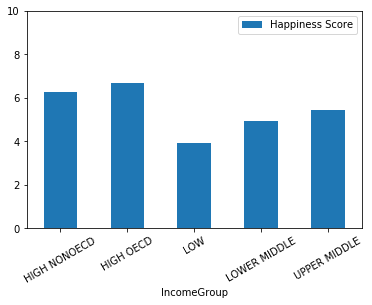

In [352]:
pv_incomes.plot(kind = "bar", rot = 30, ylim = (0,10))